# MISSION
- Vous êtes data analyst dans un cabinet réputé spécialisé dans les métiers de la data.
- Les commerciaux disposent de données dans le monde entier et doivent déterminer où installer un nouveau bureau, afin de capter les profils les plus intéressants.
- Cette étude est cruciale et vous devez également fournir un bon moyen de récupérer le plus d'informations possible.
- Bonne chance !

# CONTENU
- il y a deux datasets, avec localisation de l'entreprise et du candidat.
- prendre celui de 607 lignes
- Aussi, pour chacun, vous avez le titre du poste, le contrat, le ratio de télétravail, la taille de l'entreprise, le salaire et l'année de travail.

# Des questions
- Sur quel(s) profil(s), contrat(s) et localisation de l'entreprise privilégier ?
- Quelle est la principale tendance ?
- Fournir une analyse complète des différents types d'emplois dans le domaine des données.

# Pistes
- le cabinet doit recruter des profils ==> quels sont les lieux de residence avec les meilleurs profils ?
- ou sont situés les entreprises ?

# IMPORT DES BIBLIOTHEQUES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

# IMPORT DATASET

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/refs/heads/main/datasets/ds_salaries%20-%20Vanilla.csv')

In [3]:
# data_salaire = pd.read_csv('salaries.csv')

# FONCTION EXPLORATION DES DONNEES DATASET

In [4]:
# je supprime une colonne inutile

data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
# je crée ma focntion d'exploration du dataset

def fn_explore(df):
    display(
        df.head(),
        df.dtypes,
        df.info(),
        df.isna().sum(),
        df.describe(),
        df.describe().corr()
    )

In [6]:
fn_explore(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

None

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.180303,0.298904,-0.436040
salary,0.180303,1.000000,0.964886,-0.082764
salary_in_usd,0.298904,0.964886,1.000000,-0.180225
remote_ratio,-0.436040,-0.082764,-0.180225,1.000000


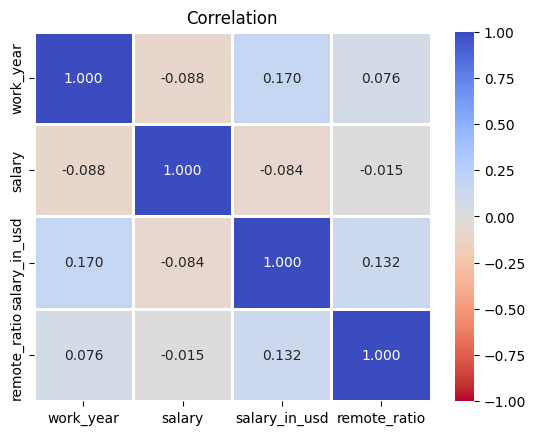

In [7]:
# matrice de corrélation pour vérifier s'il y a des corrélations

sns.heatmap(
    data=data.select_dtypes('number').corr(),
    vmin = -1,                                # vmin et vmax ==> pour borner l'echelle de corrélation située à droite
    vmax = 1,
    annot = True,
    fmt= '.3f'   ,                           # annot = False ==> pour ne pas afficher les valeurs dans chaque case
    linewidths = 1,                             # linewidths = 1 ==> pour modifier la taille des cases, le chiffre est modifiable
    center = 0,
    cmap= 'coolwarm_r'
    )
# sns.set_palette('pastel')                               # set_palette ==> pour choisir la couleur                        
plt.title('Correlation')
plt.show()

In [8]:
""" 
suite à affichage de matrice de corrélation
- absence de corrélation positive forte
- tous les résultats positifs et négatifs sont +/- 0.1 autour de 0 ==> absence de corrélation donc
"""

' \nsuite à affichage de matrice de corrélation\n- absence de corrélation positive forte\n- tous les résultats positifs et négatifs sont +/- 0.1 autour de 0 ==> absence de corrélation donc\n'

# FONCTION POUR EXPLORER LES COLONNES

In [9]:
def fn_explore_colonne(column_name):
    display(
        f'nb valeurs uniques',
        data[column_name].unique(),
        f'value_counts',
        data[column_name].value_counts(),
        data[column_name].value_counts(normalize=True)*100,
        data[column_name].value_counts().sum(), 
    )

In [10]:
def fn_change_code_country(text):
    try:
        return pycountry.countries.get(alpha_2=text).name
    except:
        return None

In [11]:
# je dois créer une fonction pour ajouter les continents associés aux pays

# colonne work_year

In [12]:
fn_explore_colonne('work_year')

'nb valeurs uniques'

array([2020, 2021, 2022])

'value_counts'

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

work_year
2022    52.388797
2021    35.749588
2020    11.861614
Name: proportion, dtype: float64

np.int64(607)

In [13]:
# je recherche le nombre d'années d'expériences par rapport au niveau d'experience
# combien d'années d'expériece faut il ppur atteindre niveau 1, 2, 3 et 4

# data.groupby(['experience_level'])

In [14]:
# je recherche le nombre d'années d'expérience par rapport au 4 jobs les plus représentés



# colonne experience_level

In [15]:
fn_explore_colonne('experience_level')

'nb valeurs uniques'

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

'value_counts'

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

experience_level
SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: proportion, dtype: float64

np.int64(607)

In [16]:
""""
SE ==> Some Experience ==> Junior ==> 46% des données
MI ==> Mid Level ==> Intermediaire ==> 35% des données
EN ==> Experienced ==> Avancé ou Confirmé ==> 14% des données
EX ==> Expert ==> 4% des données
"""

'"\nSE ==> Some Experience ==> Junior ==> 46% des données\nMI ==> Mid Level ==> Intermediaire ==> 35% des données\nEN ==> Experienced ==> Avancé ou Confirmé ==> 14% des données\nEX ==> Expert ==> 4% des données\n'

In [17]:
# objectif: remplacer les abréviations par leur noms complet
# je crée une fonction pour remplacer toutes les valeurs en créant une nouvelle colonne

def fn_change_exp_level(text):
    if text == 'SE':
        return('Junior')
    if text == 'MI':
        return('Intermédiaire')
    if text == 'EN':
        return('Avancé/ Confirmé')
    if text == 'EX':
        return('Expert')

In [18]:
data['experience_level_new'] = data['experience_level'].apply(lambda x: fn_change_exp_level(x))

In [19]:
data.sample(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new
108,2021,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M,Junior
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L,Intermédiaire


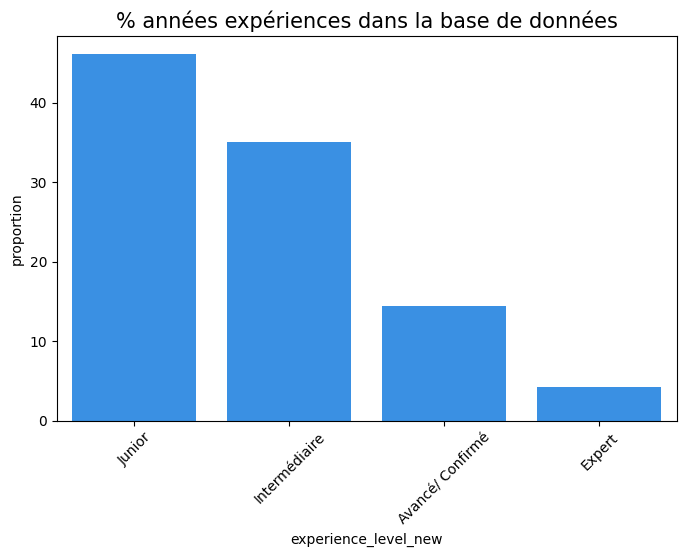

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(
            data['experience_level_new'].value_counts(normalize=True)*100,
            color='dodgerblue'
            )
plt.title('% années expériences dans la base de données', fontsize=15)
plt.xticks(rotation=45)
plt.show()

# colonne employment_type

In [21]:
fn_explore_colonne('employment_type')

'nb valeurs uniques'

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

'value_counts'

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

employment_type
FT    96.869852
PT     1.647446
CT     0.823723
FL     0.658979
Name: proportion, dtype: float64

np.int64(607)

In [22]:
# je cherche à remplacer les abréviations de la colonne employment_type par leurs noms complet
# je crée une fonction avec un apply

def fn_change_employ_type (text):
    if text == 'FT':
        return('Full-Time')
    if text == 'PT':
        return('Part-Time')
    if text == 'CT':
        return('Contract')
    if text == 'FL':
        return('Freelance')

In [23]:
data['employment_type_new'] = data['employment_type'].apply(lambda x: fn_change_employ_type(x))

In [24]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Intermédiaire,Full-Time
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Junior,Full-Time


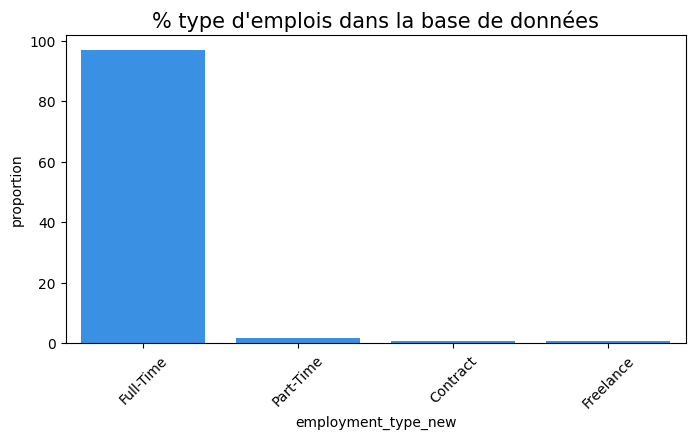

In [25]:
# je cherche à comparer les différents types d'emploi

plt.figure(figsize=(8,4))
sns.barplot(
            data['employment_type_new'].value_counts(normalize=True)*100,
            color='dodgerblue'
            )
plt.title("% type d'emplois dans la base de données", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
""""
le FT (full time job) est le type d'emploi le plus représenté
"""

'"\nle FT (full time job) est le type d\'emploi le plus représenté\n'

# colonne company_location

In [27]:
fn_explore_colonne('company_location')

'nb valeurs uniques'

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

'value_counts'

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
PT      4
PL      4
AT      4
MX      3
DK      3
AE      3
PK      3
LU      3
TR      3
BR      3
AU      3
RU      2
CN      2
CH      2
BE      2
NG      2
SI      2
IT      2
CZ      2
NZ      1
HU      1
HN      1
SG      1
HR      1
MT      1
IL      1
UA      1
RO      1
IQ      1
MD      1
CL      1
IR      1
VN      1
KE      1
CO      1
AS      1
DZ      1
EE      1
MY      1
IE      1
Name: count, dtype: int64

company_location
US    58.484349
GB     7.742998
CA     4.942339
DE     4.612850
IN     3.953871
FR     2.471170
ES     2.306425
GR     1.812191
JP     0.988468
NL     0.658979
PT     0.658979
PL     0.658979
AT     0.658979
MX     0.494234
DK     0.494234
AE     0.494234
PK     0.494234
LU     0.494234
TR     0.494234
BR     0.494234
AU     0.494234
RU     0.329489
CN     0.329489
CH     0.329489
BE     0.329489
NG     0.329489
SI     0.329489
IT     0.329489
CZ     0.329489
NZ     0.164745
HU     0.164745
HN     0.164745
SG     0.164745
HR     0.164745
MT     0.164745
IL     0.164745
UA     0.164745
RO     0.164745
IQ     0.164745
MD     0.164745
CL     0.164745
IR     0.164745
VN     0.164745
KE     0.164745
CO     0.164745
AS     0.164745
DZ     0.164745
EE     0.164745
MY     0.164745
IE     0.164745
Name: proportion, dtype: float64

np.int64(607)

In [28]:
data['company_location_new'] = data['company_location'].apply(lambda x: fn_change_code_country(x))

In [29]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Junior,Full-Time,United States
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Junior,Full-Time,United States
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Junior,Full-Time,United States
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Junior,Full-Time,United States
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,Intermédiaire,Full-Time,United States


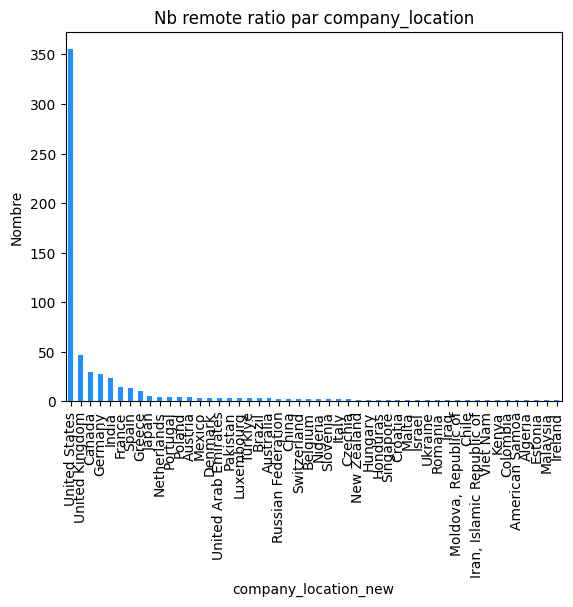

In [30]:
# je recherche le nombre de remote ratio

data['company_location_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb remote ratio par company_location')
plt.ylabel('Nombre')
plt.show()

# colonne remote_ratio

In [31]:
fn_explore_colonne('remote_ratio')

'nb valeurs uniques'

array([  0,  50, 100])

'value_counts'

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

remote_ratio
100    62.76771
0      20.92257
50     16.30972
Name: proportion, dtype: float64

np.int64(607)

In [32]:
# je cherche à remplacer les valeurs de la colonne remote_ratio
# je crée une fonction

def fn_change_remote_ratio(nb):
    if nb == 100:
        return('Fully remote (more than 80%)')
    if nb == 0:
        return('No remote work (less than 20%)')
    if nb == 50:
        return('Partially remote/hybrid')

In [33]:
data['remote_ratio_new'] = data['remote_ratio'].apply(lambda x: fn_change_remote_ratio(x))

In [34]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Intermédiaire,Full-Time,Germany,No remote work (less than 20%)
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Junior,Full-Time,Japan,No remote work (less than 20%)
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Junior,Full-Time,United Kingdom,Partially remote/hybrid
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Intermédiaire,Full-Time,Honduras,No remote work (less than 20%)
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Junior,Full-Time,United States,Partially remote/hybrid


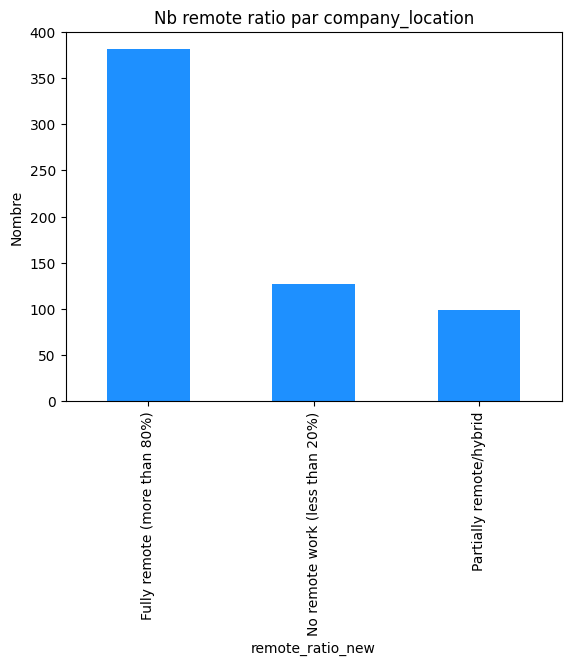

In [35]:
# je recherche le nombre de remote ratio

data['remote_ratio_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb remote ratio par company_location')
plt.ylabel('Nombre')
plt.show()


<Axes: xlabel='remote_ratio_new'>

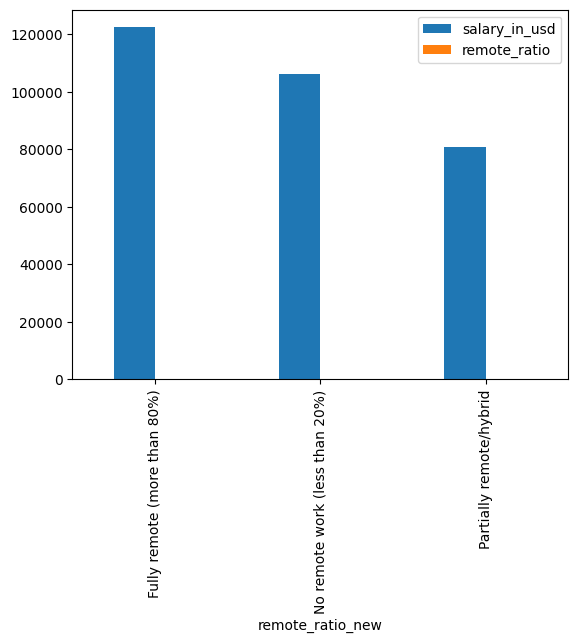

In [36]:
data.groupby(['remote_ratio_new']).mean('salary_in_usd') \
                                    .drop(columns=['work_year', 'salary']) \
                                    .plot(kind='bar')

# colonne employee_residence

In [37]:
fn_explore_colonne('employee_residence')

'nb valeurs uniques'

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

'value_counts'

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
PK      6
BR      6
NL      5
IT      4
RU      4
PL      4
AE      3
TR      3
AU      3
VN      3
AT      3
DK      2
NG      2
HU      2
MX      2
SI      2
RO      2
BE      2
SG      2
PH      1
CN      1
HN      1
NZ      1
UA      1
IQ      1
CL      1
MT      1
IR      1
CO      1
HR      1
BG      1
KE      1
MD      1
RS      1
HK      1
LU      1
JE      1
CZ      1
PR      1
AR      1
DZ      1
MY      1
TN      1
EE      1
BO      1
IE      1
CH      1
Name: count, dtype: int64

employee_residence
US    54.695222
GB     7.248764
IN     4.942339
CA     4.777595
DE     4.118616
FR     2.965404
ES     2.471170
GR     2.141680
JP     1.153213
PT     0.988468
PK     0.988468
BR     0.988468
NL     0.823723
IT     0.658979
RU     0.658979
PL     0.658979
AE     0.494234
TR     0.494234
AU     0.494234
VN     0.494234
AT     0.494234
DK     0.329489
NG     0.329489
HU     0.329489
MX     0.329489
SI     0.329489
RO     0.329489
BE     0.329489
SG     0.329489
PH     0.164745
CN     0.164745
HN     0.164745
NZ     0.164745
UA     0.164745
IQ     0.164745
CL     0.164745
MT     0.164745
IR     0.164745
CO     0.164745
HR     0.164745
BG     0.164745
KE     0.164745
MD     0.164745
RS     0.164745
HK     0.164745
LU     0.164745
JE     0.164745
CZ     0.164745
PR     0.164745
AR     0.164745
DZ     0.164745
MY     0.164745
TN     0.164745
EE     0.164745
BO     0.164745
IE     0.164745
CH     0.164745
Name: proportion, dtype: float64

np.int64(607)

In [38]:
len(pycountry.countries)

249

In [39]:
# list(pycountry.countries)

In [40]:
data['employee_residence_new'] = data['employee_residence'].apply(lambda x: fn_change_code_country(x))

In [41]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Intermédiaire,Full-Time,Germany,No remote work (less than 20%),Germany
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Junior,Full-Time,Japan,No remote work (less than 20%),Japan
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Junior,Full-Time,United Kingdom,Partially remote/hybrid,United Kingdom
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Intermédiaire,Full-Time,Honduras,No remote work (less than 20%),Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Junior,Full-Time,United States,Partially remote/hybrid,United States


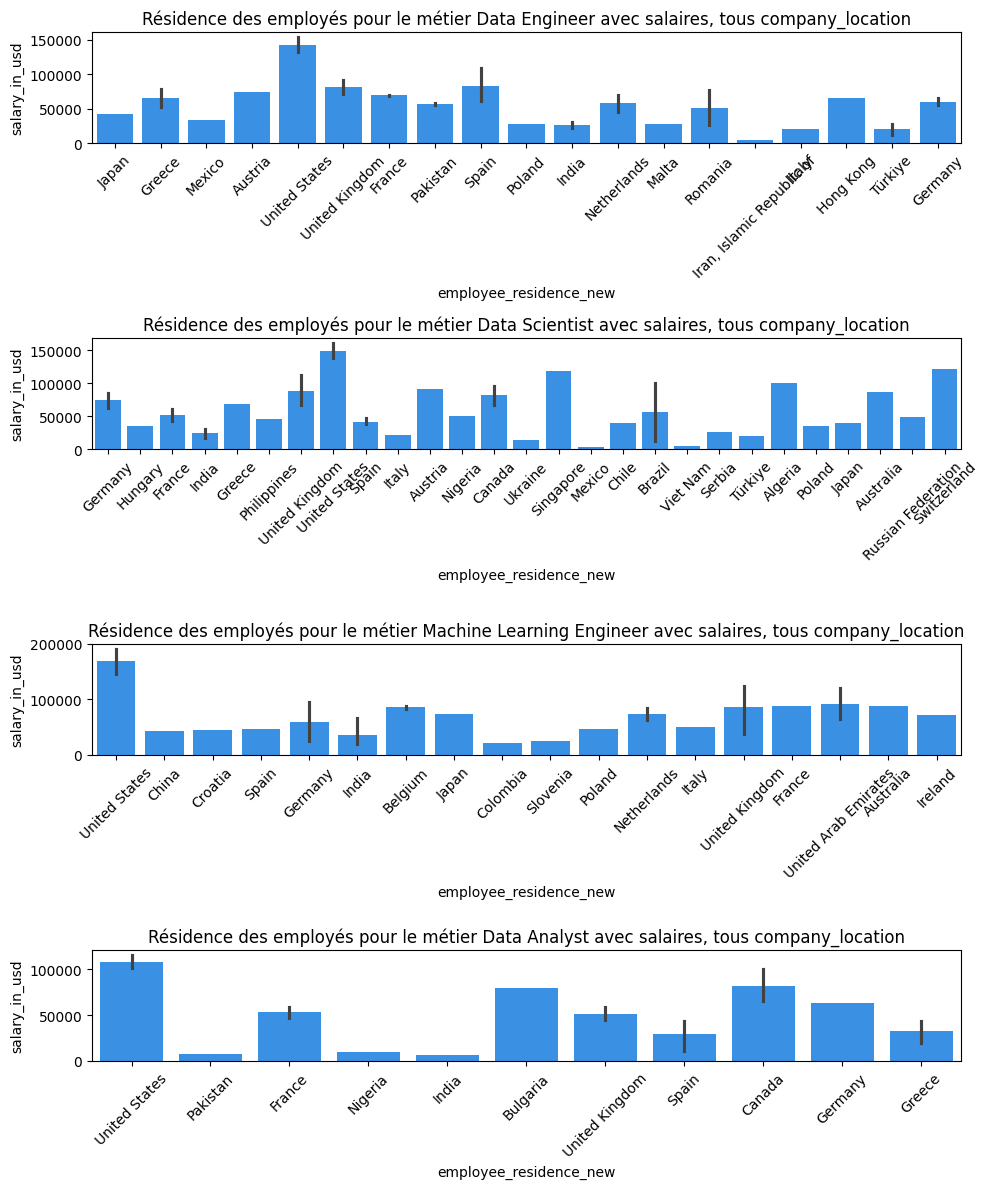

In [42]:
# je recherche les employee_residence avec leur niveau de salaire pour mes 4 jobs

# je déclare ma figure, son nombre de ligne, son nombre de colonne et sa taille
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))  # 4 graphiques verticaux

# je déclare une liste contenant les 4 jobs
list_job = ['Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Data Analyst']

# je crée une boucle avec fonction len qui prend en paramètre list_job
# la boucle va itérer sur chacun des jobs contenus dans la liste
for job in range(len(list_job)):

    # je declare la variable job_title pour filtrer les jobs depuis data 
    job_title = data[data['job_title'] == list_job[job]]

    # je choisis un histplot pour représenter mes graphiques
    sns.barplot(data=job_title, x='employee_residence_new', y='salary_in_usd', color='dodgerblue', ax=axes[job])
    
    # affichage du titre
    axes[job].set_title(f"Résidence des employés pour le métier {list_job[job]} avec salaires, tous company_location", fontsize=12)
    axes[job].tick_params(axis='x', rotation=45)  # Rotation des labels en X pour la lisibilité

# tight_layout ==> pour ajuster l'espace entre les figures
plt.tight_layout()

plt.show()

# colonne company_size

In [43]:
fn_explore_colonne('company_size')

'nb valeurs uniques'

array(['L', 'S', 'M'], dtype=object)

'value_counts'

company_size
M    326
L    198
S     83
Name: count, dtype: int64

company_size
M    53.706755
L    32.619440
S    13.673806
Name: proportion, dtype: float64

np.int64(607)

In [44]:
# je cherche a remplacer les abréviations de la colonne company_size
# je crée une fonction avec apply pour créer une nouvelle colonne

def fn_change_company_size(text):
    if text == 'M':
        return('Medium: 50 à 250 salariés')
    if text == 'L':
        return('Large: +250 salariés')
    if text == 'S':
        return('Small: -50 salariés')

In [45]:
data['company_size_new'] = data['company_size'].apply(lambda x: fn_change_company_size(x))

In [46]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new,company_size_new
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Intermédiaire,Full-Time,Germany,No remote work (less than 20%),Germany,Large: +250 salariés
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Junior,Full-Time,Japan,No remote work (less than 20%),Japan,Small: -50 salariés
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Junior,Full-Time,United Kingdom,Partially remote/hybrid,United Kingdom,Medium: 50 à 250 salariés
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Intermédiaire,Full-Time,Honduras,No remote work (less than 20%),Honduras,Small: -50 salariés
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Junior,Full-Time,United States,Partially remote/hybrid,United States,Large: +250 salariés


# colonne salary_in_usd

In [47]:
def fn_salary_usd(col_salary):
    display(
        f'Moyenne',
            round(data[col_salary].mean(), 2),
        f'Ecart type',
            round(data[col_salary].std(), 2),
        f'Minimum',
            round(data[col_salary].min(), 2),
        f'maximum',
            round(data[col_salary].max(), 2)
    )

In [48]:
fn_salary_usd('salary_in_usd')

'Moyenne'

np.float64(112297.87)

'Ecart type'

np.float64(70957.26)

'Minimum'

np.int64(2859)

'maximum'

np.int64(600000)

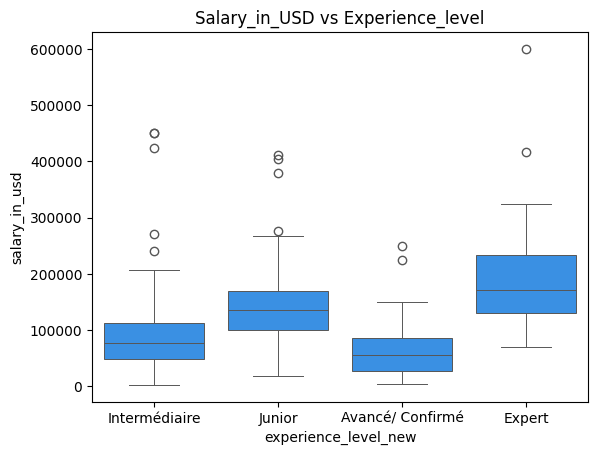

In [49]:
# je cherche à analyser la distribution des salaires en fonction de experience_level

sns.boxplot(
    data=data,
    x='experience_level_new',
    y='salary_in_usd',
    fill=True,
    linewidth=0.7,
    color='dodgerblue'
    )
plt.title('Salary_in_USD vs Experience_level')
plt.show()

In [50]:
""""

"""

'"\n\n'

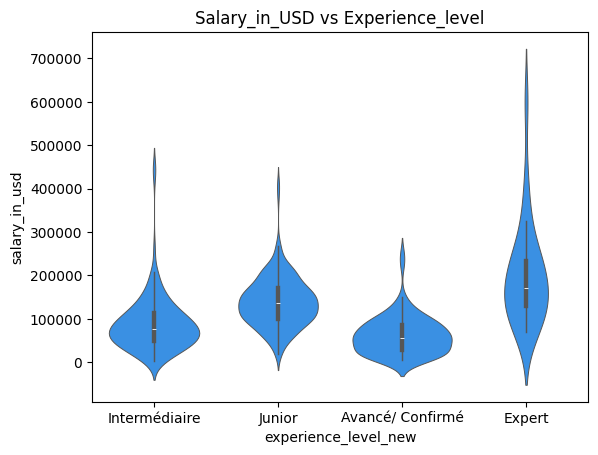

In [51]:
# graphique de dispersion
# je cherche la dispersion des salaires selon le niveau d'experience

sns.violinplot(
    data=data,
    x='experience_level_new',
    y='salary_in_usd',
    fill=True,
    linewidth=0.7,
    color='dodgerblue'
    )
plt.title('Salary_in_USD vs Experience_level')
plt.show()

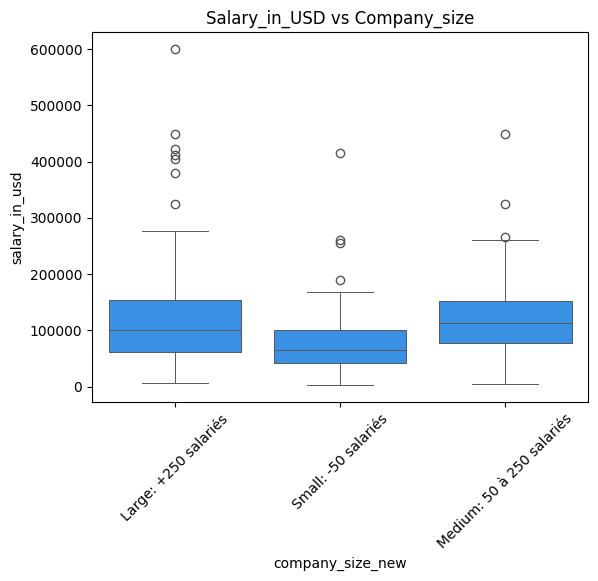

In [52]:
# je cherche à analyser la distribution des salaires dans les company_size

sns.boxplot(
    data=data,
    x='company_size_new',
    y='salary_in_usd',
    fill=True,
    linewidth=0.7,
    color='dodgerblue'
    )
plt.title('Salary_in_USD vs Company_size')
plt.xticks(rotation=45)
plt.show()

In [53]:
"""
- L : la boite est plus haute, traits verticaux compris ==> distribution des salaires plus dispersée que dans M et S
- 25% des salaires se situent entre 70 et 100 K usd
- salaire médian autour de 100 K usd ==> plus élevé que dans M ou S
- 75% des salaires se situent entre 100 et 170 K usd
- présence d'outliers (valeurs extremes) ==> salaires exceptionnellement élevés
"""

"\n- L : la boite est plus haute, traits verticaux compris ==> distribution des salaires plus dispersée que dans M et S\n- 25% des salaires se situent entre 70 et 100 K usd\n- salaire médian autour de 100 K usd ==> plus élevé que dans M ou S\n- 75% des salaires se situent entre 100 et 170 K usd\n- présence d'outliers (valeurs extremes) ==> salaires exceptionnellement élevés\n"

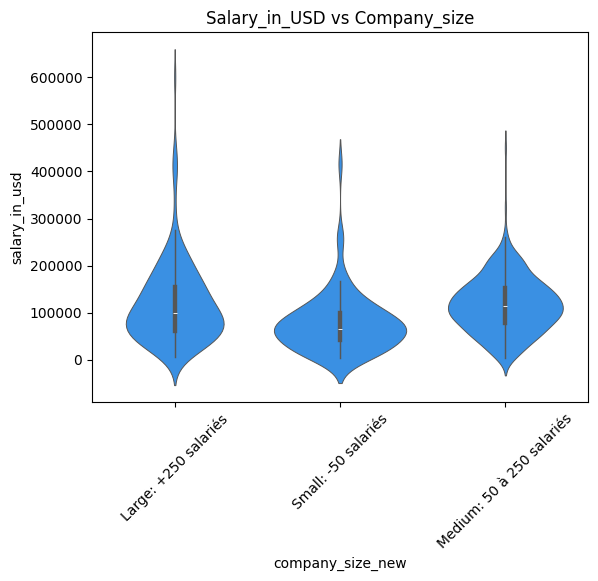

In [54]:
# graphique de dispersion
# je cherche la dispersion des salaires selon le niveau d'experience

sns.violinplot(
    data=data,
    x='company_size_new',
    y='salary_in_usd',
    fill=True,
    linewidth=0.7,
    color='dodgerblue'
    )
plt.title('Salary_in_USD vs Company_size')
plt.xticks(rotation=45)
plt.show()

# colonne job_title

In [55]:
fn_explore_colonne('job_title')

'nb valeurs uniques'

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

'value_counts'

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

job_title
Data Scientist                              23.558484
Data Engineer                               21.746293
Data Analyst                                15.980231
Machine Learning Engineer                    6.754530
Research Scientist                           2.635914
Data Science Manager                         1.976936
Data Architect                               1.812191
Machine Learning Scientist                   1.317957
Big Data Engineer                            1.317957
Director of Data Science                     1.153213
AI Scientist                                 1.153213
Principal Data Scientist                     1.153213
Data Science Consultant                      1.153213
Data Analytics Manager                       1.153213
BI Data Analyst                              0.988468
Computer Vision Engineer                     0.988468
ML Engineer                                  0.988468
Lead Data Engineer                           0.988468
Applied Data Scien

np.int64(607)

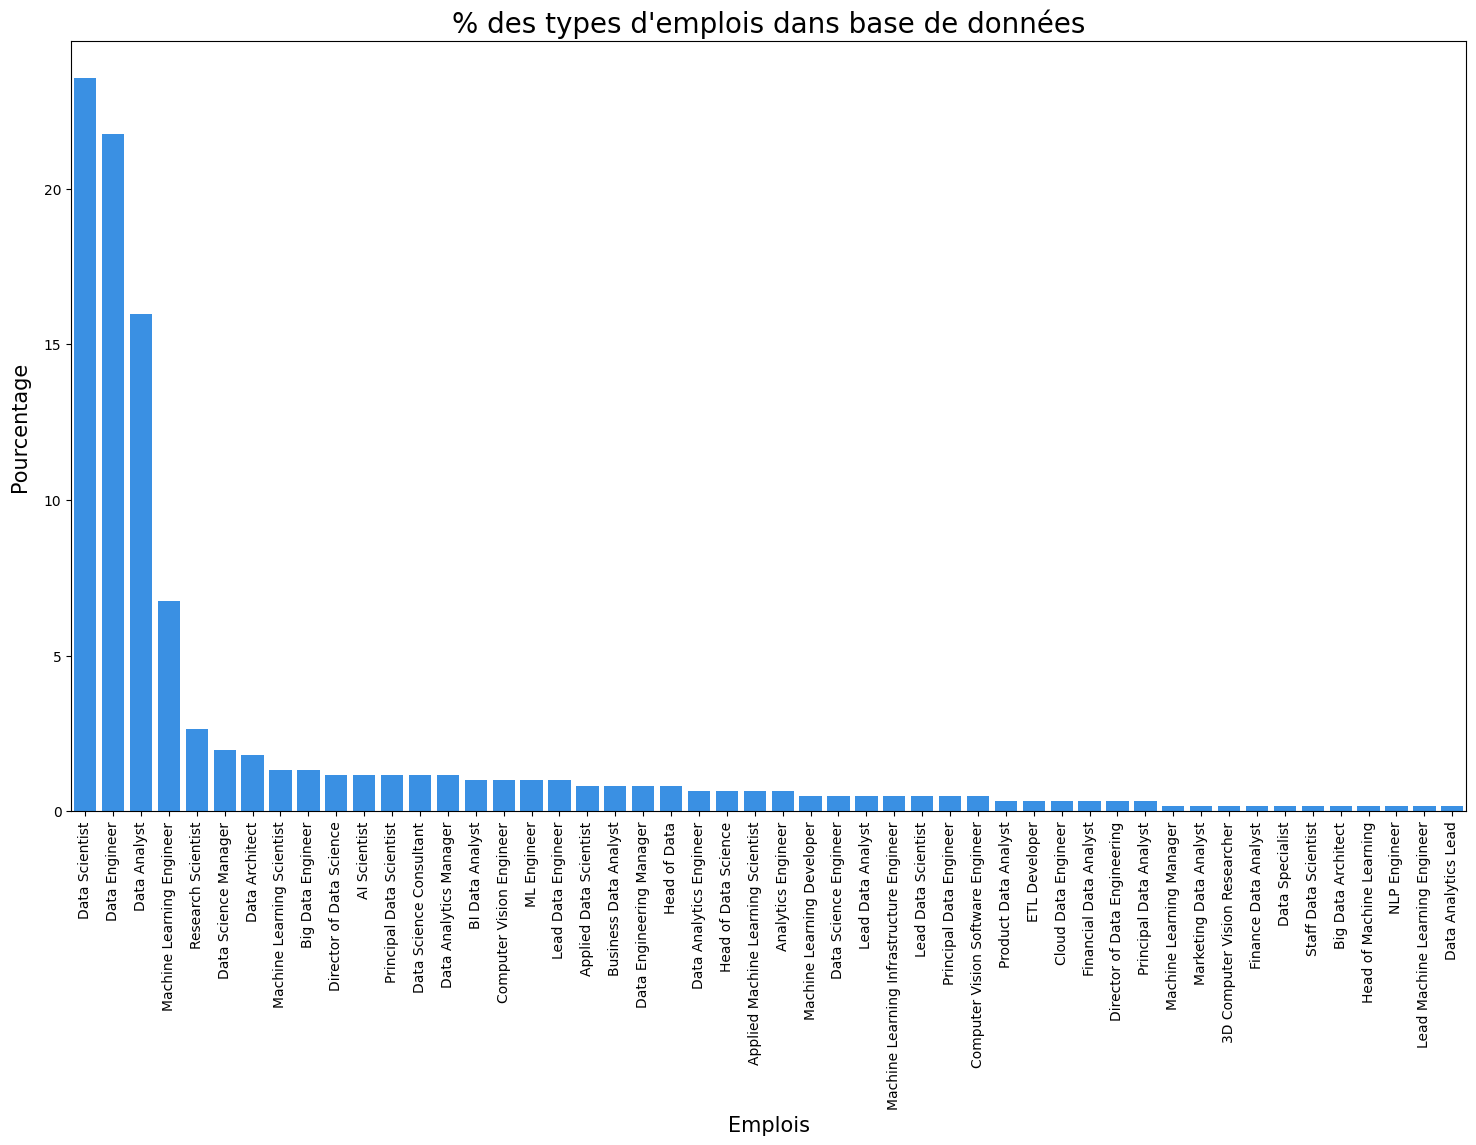

In [56]:
# j'affiche les % des types d'emplois dans la base de données

plt.figure(figsize=(18,10))
sns.barplot(
            data=data['job_title'].value_counts(normalize=True)*100,
            color='dodgerblue'
            )
plt.title("% des types d'emplois dans base de données", fontsize= 20)
plt.xticks(rotation=90)
plt.ylabel('Pourcentage', labelpad=10, fontsize=15)
plt.xlabel('Emplois', fontsize=15)
plt.show()

# j'isole les 4 jobs les plus représentés

In [57]:
# je crée un dataframe avec les 4 jobs les plus representés

df_top_4_job = data.loc[data['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer'])]

In [58]:
df_top_4_job.groupby(['company_location', 'job_title', 'salary_currency', 'salary_in_usd']) \
                .mean('salary_in_usd') \
                    .reset_index() \
                        .drop(columns=['remote_ratio'])

,company_location,job_title,salary_currency,salary_in_usd,work_year,salary
0,AE,Machine Learning Engineer,USD,65000,2022.0,65000.0
1,AE,Machine Learning Engineer,USD,120000,2022.0,120000.0
2,AT,Data Engineer,EUR,74130,2020.0,65000.0
3,AT,Data Scientist,EUR,61467,2021.0,52000.0
4,AT,Data Scientist,EUR,91237,2020.0,80000.0
...,...,...,...,...,...,...
319,US,Machine Learning Engineer,USD,200000,2021.0,200000.0
320,US,Machine Learning Engineer,USD,214000,2022.0,214000.0
321,US,Machine Learning Engineer,USD,220000,2022.0,220000.0
322,US,Machine Learning Engineer,USD,250000,2020.0,250000.0


In [59]:
# salaire moyen en usd des 4 jobs

df_top_4_job.groupby(['job_title']) \
                .mean('salary_in_usd') \
                    .sort_values(by='salary_in_usd', ascending=False) \
                        .drop(columns=['remote_ratio', 'work_year', 'salary'])

,salary_in_usd
job_title,
Data Engineer,112725.000000
Data Scientist,108187.832168
Machine Learning Engineer,104880.146341
Data Analyst,92893.061856


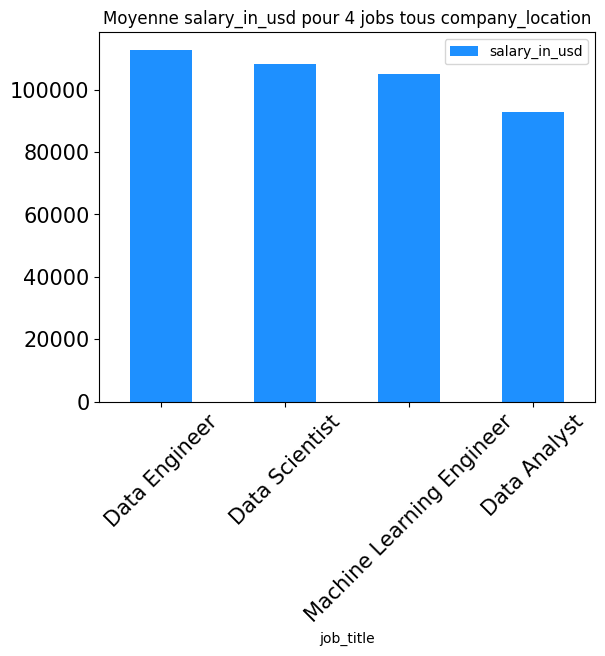

In [60]:
df_top_4_job.groupby(['job_title']) \
                .mean('salary_in_usd') \
                    .sort_values(by='salary_in_usd', ascending=False) \
                        .drop(columns=['remote_ratio', 'work_year', 'salary']) \
                            .plot(kind='bar', color='dodgerblue', fontsize= 15)

plt.title('Moyenne salary_in_usd pour 4 jobs tous company_location')
plt.xticks(rotation=45)
plt.show()

- focus data engineer

In [61]:
df_engineer = data.loc[data['job_title'].isin(['Data Engineer'])]
df_engineer.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new,company_size_new
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S,Avancé/ Confirmé,Full-Time,Japan,Fully remote (more than 80%),Japan,Small: -50 salariés
22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L,Junior,Full-Time,Greece,Partially remote/hybrid,Greece,Large: +250 salariés


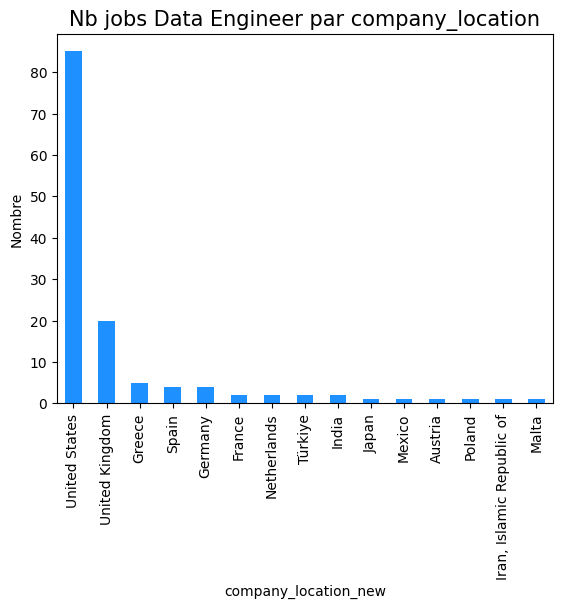

In [62]:
# je recherche le nombre de data engineer par company_location

df_engineer['company_location_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb jobs Data Engineer par company_location', fontsize= 15)
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.show()

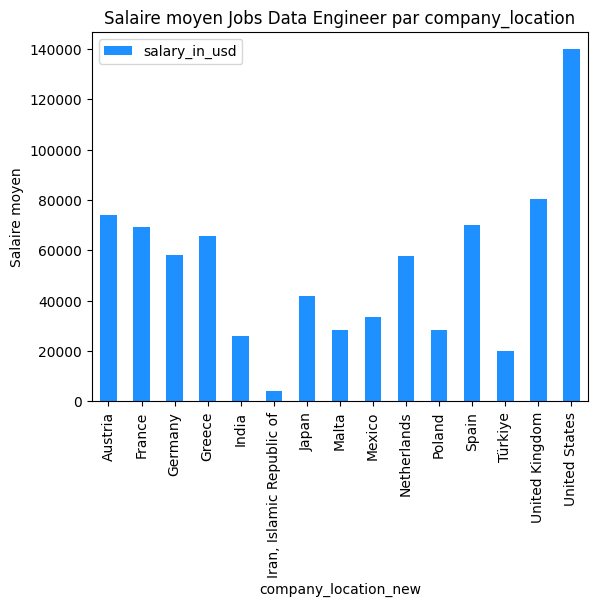

In [63]:
# je recherche le salaire moyen d'un data engineer par company_location

df_engineer.groupby(['company_location_new']).mean('salary_in_usd').drop(columns=['salary', 'work_year', 'remote_ratio']).plot(kind='bar', color='dodgerblue')
plt.title('Salaire moyen Jobs Data Engineer par company_location')
plt.ylabel('Salaire moyen')
plt.xticks(rotation=90)
plt.show()

- focus data scientist

In [64]:
df_scientist = data.loc[data['job_title'].isin(['Data Scientist'])]
df_scientist.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new,company_size_new
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Intermédiaire,Full-Time,Germany,No remote work (less than 20%),Germany,Large: +250 salariés
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Intermédiaire,Full-Time,Hungary,Partially remote/hybrid,Hungary,Large: +250 salariés


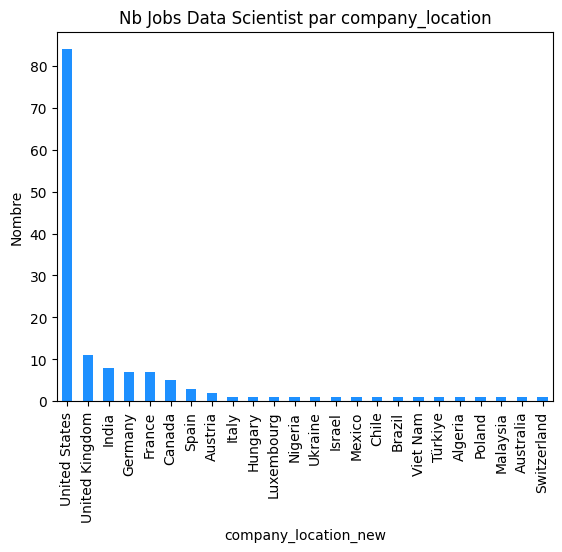

In [65]:
# je recherche le nombre de data scientist par company_location

df_scientist['company_location_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb Jobs Data Scientist par company_location')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.show()

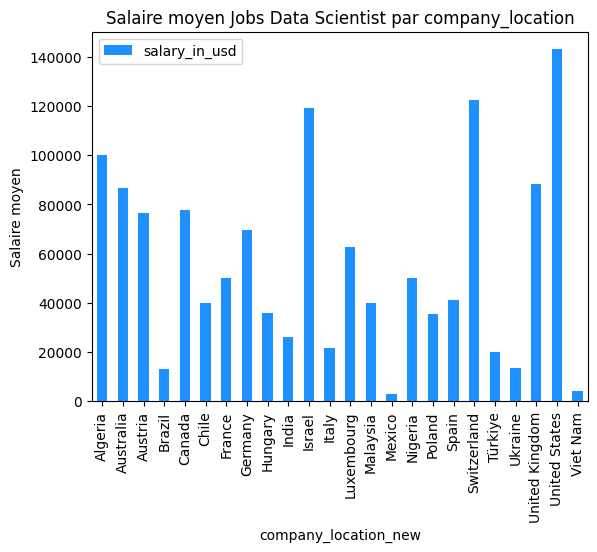

In [66]:
# je recherche le salaire moyen d'un data scientist par company_location

df_scientist.groupby(['company_location_new']).mean('salary_in_usd').drop(columns=['salary', 'work_year', 'remote_ratio']).plot(kind='bar', color='dodgerblue')
plt.title('Salaire moyen Jobs Data Scientist par company_location')
plt.ylabel('Salaire moyen')
plt.show()

- focus machine learning engineer

In [67]:
df_ml_engineer = data.loc[data['job_title'].isin(['Machine Learning Engineer'])]
df_ml_engineer.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new,company_size_new
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Junior,Full-Time,United States,Partially remote/hybrid,United States,Large: +250 salariés
20,2020,MI,FT,Machine Learning Engineer,299000,CNY,43331,CN,0,CN,M,Intermédiaire,Full-Time,China,No remote work (less than 20%),China,Medium: 50 à 250 salariés


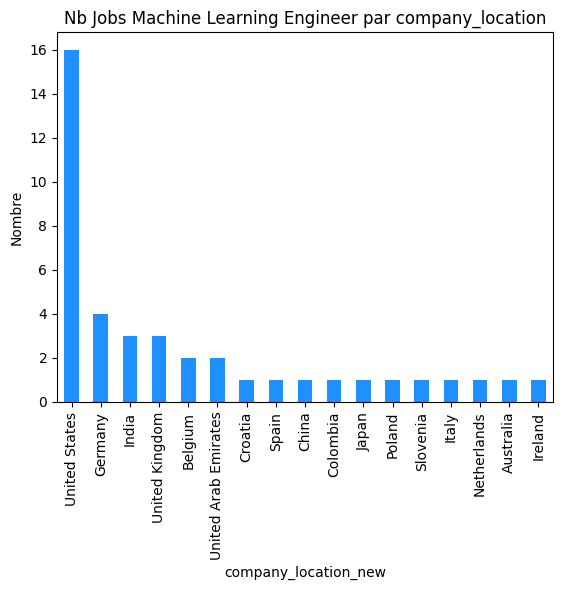

In [68]:
# je recherche le nombre de machine learning par company_location

df_ml_engineer['company_location_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb Jobs Machine Learning Engineer par company_location')
plt.ylabel('Nombre')

plt.show()

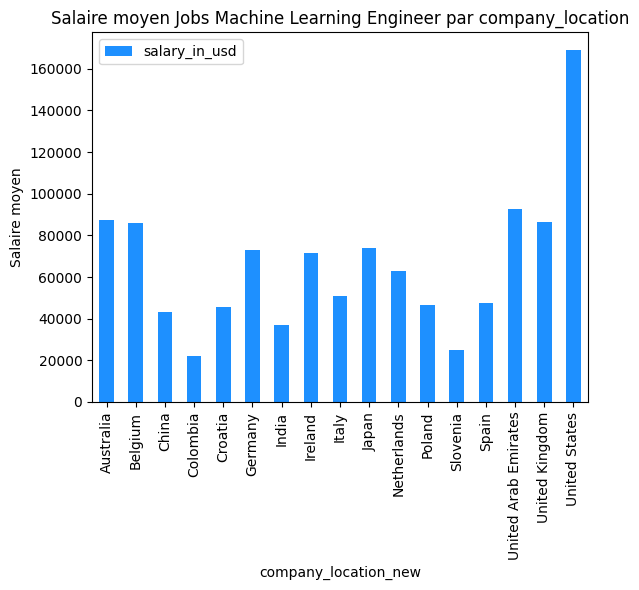

In [69]:
# je recherche le salaire moyen d'un machine learning engineer par company_location

df_ml_engineer.groupby(['company_location_new']).mean('salary_in_usd').drop(columns=['salary', 'work_year', 'remote_ratio']).plot(kind='bar', color='dodgerblue')
plt.title('Salaire moyen Jobs Machine Learning Engineer par company_location')
plt.ylabel('Salaire moyen')
plt.xticks(rotation=90)
plt.show()

- focus data analyst

In [70]:
df_data_analyst = data.loc[data['job_title'].isin(['Data Analyst'])]
df_data_analyst.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_new,employment_type_new,company_location_new,remote_ratio_new,employee_residence_new,company_size_new
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Avancé/ Confirmé,Full-Time,United States,Fully remote (more than 80%),United States,Large: +250 salariés
14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L,Intermédiaire,Full-Time,United States,Fully remote (more than 80%),United States,Large: +250 salariés


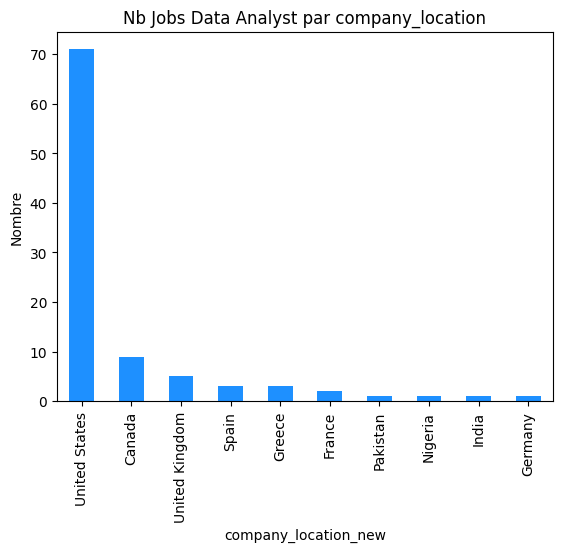

In [71]:
# je recherche le nombre de data analyst par company_location

df_data_analyst['company_location_new'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Nb Jobs Data Analyst par company_location')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.show()

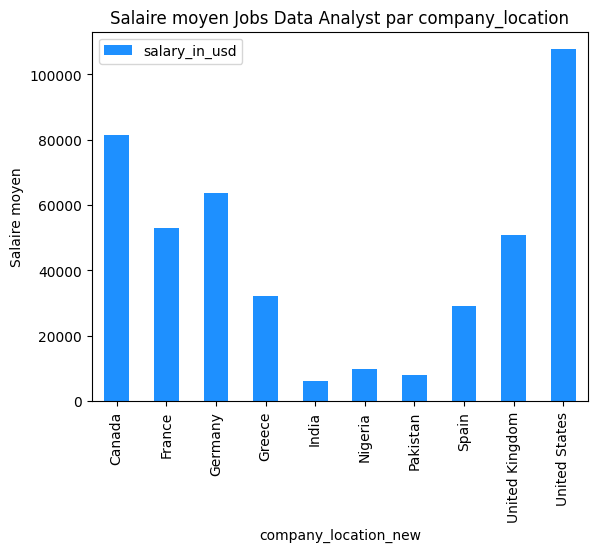

In [72]:
# je recherche le salaire moyen d'un data analyst engineer par company_location

df_data_analyst.groupby(['company_location_new']). \
                    mean('salary_in_usd'). \
                        drop(columns=['salary', 'work_year', 'remote_ratio']) \
                            .plot(kind='bar', color='dodgerblue')
plt.title('Salaire moyen Jobs Data Analyst par company_location')
plt.ylabel('Salaire moyen')
plt.xticks(rotation=90)
plt.show()

- je cherche à créer des catégories de métiers
- objectif ==> créer des catégories de métiers par caractéristiques

In [73]:
# je crée une fonction pour créer 4 catégories 

def fn_cat_job(text):
    if 'Data Analyst' in text:
        return 'Data Analyst'
    elif 'Data Scientist' in text:
        return 'Data Scientist'
    elif 'Data Engineer' in text:
        return 'Data Engineer'
    elif 'Machine Learning' in text:
        return 'Machine Learning'
    elif 'ML Engineer' in text:
        return 'Machine Learning'
    elif 'NLP Engineer' in text:
        return 'Machine Learning'
    else:
        return 'Other'
    

In [74]:
# j'applique ma fonction avec lambda en créant une nouvelle colonne

data['categ_job_title'] = data['job_title'].apply(lambda x: fn_cat_job(x))

In [75]:
data['categ_job_title'].value_counts()

categ_job_title
Data Scientist      159
Data Engineer       158
Data Analyst        119
Other               102
Machine Learning     69
Name: count, dtype: int64

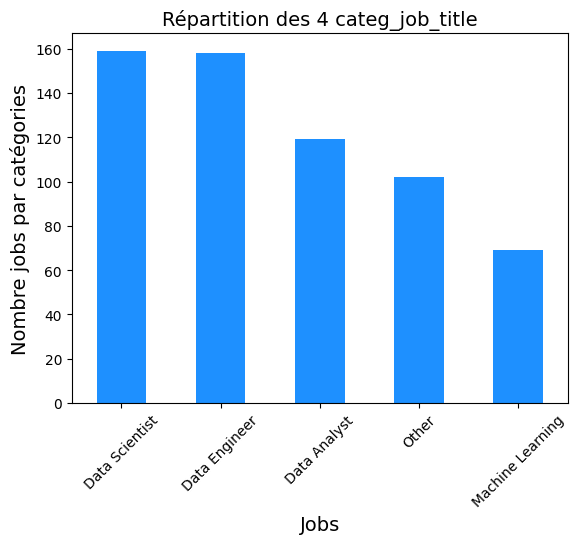

In [76]:
data['categ_job_title'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Répartition des 4 categ_job_title', fontsize=14)
plt.ylabel('Nombre jobs par catégories', fontsize=14)
plt.xlabel('Jobs', fontsize=14)
plt.xticks(rotation=45)
plt.show()

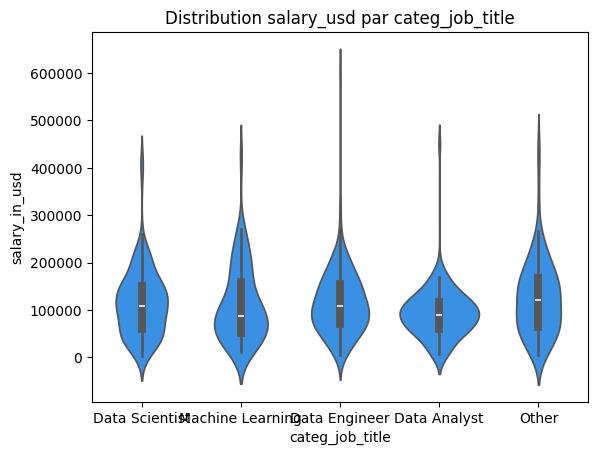

In [77]:
sns.violinplot(
            data=data,
            x='categ_job_title',
            y='salary_in_usd',
            color='dodgerblue'
            )
plt.title('Distribution salary_usd par categ_job_title')
plt.show()

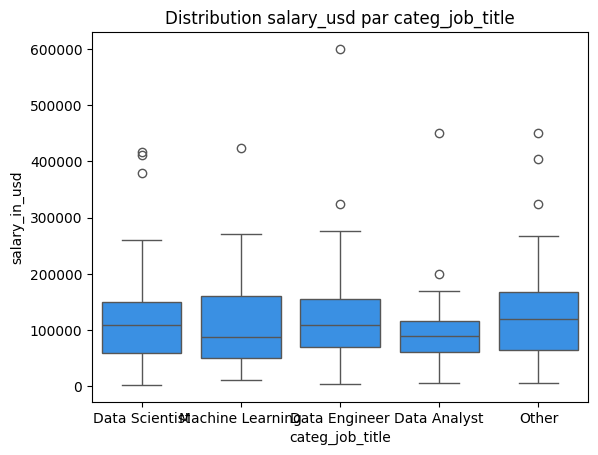

In [78]:
sns.boxplot(
            data=data,
            x='categ_job_title',
            y='salary_in_usd',
            color='dodgerblue'
            )
plt.title('Distribution salary_usd par categ_job_title')
plt.show()

# df final

In [79]:
data.to_csv('data_clean.csv')

In [80]:
data['categ_job_title'].value_counts()

categ_job_title
Data Scientist      159
Data Engineer       158
Data Analyst        119
Other               102
Machine Learning     69
Name: count, dtype: int64

# test pycountry

In [81]:
pays = [country.name for country in pycountry.countries ]
pays

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'French Southern Territories',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire, Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Saint Barthélemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Cocos (Keeling) Islands',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, The Democratic Republic of the',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Christmas Island',
 'Cayman Islands',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica'

In [82]:
pycountry.countries.search_fuzzy('Capital')

[Country(alpha_2='PY', alpha_3='PRY', flag='🇵🇾', name='Paraguay', numeric='600', official_name='Republic of Paraguay'),
 Country(alpha_2='SB', alpha_3='SLB', flag='🇸🇧', name='Solomon Islands', numeric='090'),
 Country(alpha_2='AU', alpha_3='AUS', flag='🇦🇺', name='Australia', numeric='036'),
 Country(alpha_2='BE', alpha_3='BEL', flag='🇧🇪', name='Belgium', numeric='056', official_name='Kingdom of Belgium'),
 Country(alpha_2='CO', alpha_3='COL', flag='🇨🇴', name='Colombia', numeric='170', official_name='Republic of Colombia'),
 Country(alpha_2='NG', alpha_3='NGA', flag='🇳🇬', name='Nigeria', numeric='566', official_name='Federal Republic of Nigeria'),
 Country(alpha_2='PG', alpha_3='PNG', flag='🇵🇬', name='Papua New Guinea', numeric='598', official_name='Independent State of Papua New Guinea'),
 Country(alpha_2='PH', alpha_3='PHL', flag='🇵🇭', name='Philippines', numeric='608', official_name='Republic of the Philippines'),
 Country(alpha_2='VE', alpha_3='VEN', common_name='Venezuela', flag='🇻

# RAJOUTER UNE COLONNE CONTINENT

In [83]:
# def fn_conv_devise(montant_devise_à_convertir, taux_devise):
#     result = montant_devise_à_convertir*taux_devise
#     return(result)


In [84]:
# def fn_conv_devise(montant):
#     result = montant
#     taux = 0.98
#     return result*taux

In [85]:
# montant = fn_conv_devise(150)
# print(montant)

In [86]:
# data['salary'] = data['salary_in_usd'].apply(lambda x: fn_conv_devise(x))

# COMPARAISON DES SALAIRES EN DOLLARS ET EUROS SELON LE COUT DE LA VIE PAR PAYS

In [87]:
from bs4 import BeautifulSoup

In [88]:
import requests

In [89]:
url = 'https://fr.numbeo.com/co%C3%BBt-de-la-vie/classements-par-pays'

In [90]:
response = requests.get(url)
response

<Response [200]>

In [91]:
soup = BeautifulSoup(response.text, 'html.parser')

In [92]:
soup

<!DOCTYPE html>

<html lang="fr">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script defer="" src="https://www.numbeo.com/common/numbeo_standard.js"></script>
<link href="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/themes/redmond/jquery-ui.min.css" rel="Stylesheet"/>
<link href="https://www.numbeo.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.10.2/jquery.min.js"></script>
<script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/jquery-ui.min.js"></script>
<script src="https://www.gstatic.com/charts/loader.js"></script>
<link href="https://www.numbeo.com/images/apple-touch-icon.png" rel="apple-touch-icon"/>
<script>
  if (typeof whenDocReady === "function") {
    // already declared, do nothing
  } else {
    function whenDocReady(fn) {
      // see if DOM is already available
      if (document.readyState === "complete" || document.readyStat

In [93]:
pays = soup.find_all('td', {'class': 'cityOrCountryInIndicesTable'})

In [94]:
pays[0]

<td class="cityOrCountryInIndicesTable">Îles Vierges</td>

In [95]:
pays[0].get_text


<bound method PageElement.get_text of <td class="cityOrCountryInIndicesTable">Îles Vierges</td>>

In [96]:
list_pays = []
for pays in pays:
    list_pays.append(pays.text)

list_pays

['Îles Vierges',
 'Suisse',
 'Islande',
 'Bahamas',
 'Singapour',
 'Hong Kong (Chine)',
 'La Barbade',
 'Norvège',
 'Papouasie Nouvelle Guinée',
 'Danemark',
 'Guernesey',
 'Israël',
 'États Unis',
 'Luxembourg',
 'Australie',
 "L'Autriche",
 'Pays-Bas',
 'Irlande',
 'Royaume-Uni',
 'Porto Rico',
 'Finlande',
 'Canada',
 'Allemagne',
 'France',
 'Macao (Chine)',
 'Corée du Sud',
 'La Belgique',
 'Nouvelle-Zélande',
 'Suède',
 'Emirats Arabes Unis',
 'Italie',
 'Jamaïque',
 'Costa Rica',
 'Chypre',
 'Estonie',
 'Trinité-et-Tobago',
 'Yémen',
 'Bahreïn',
 'Malte',
 'Qatar',
 'Grèce',
 'Uruguay',
 'La Slovénie',
 'Japon',
 'Maldives',
 'Brunei',
 'Taïwan',
 'Lituanie',
 'Panama',
 'Espagne',
 'Lettonie',
 'Croatie',
 'Ethiopie',
 'République Tchèque',
 'Slovaquie',
 'Arabie Saoudite',
 'Belize',
 'Portugal',
 'Cuba',
 'Koweit',
 'Albanie',
 'Oman',
 'Arménie',
 'Palestine',
 'Botswana',
 'Mozambique',
 'Pologne',
 'Liban',
 "Côte d'Ivoire",
 'Somalie',
 'Le Salvador',
 'Jordan',
 'Guatema

In [97]:
indices = soup.find_all('td', {'class': 'sorting_1'})

In [98]:
indices

[]